In [12]:
import pandas as pd
#First, let's load the provided Excel file into memory and inspect the data.
#We will read all the sheets from the Excel file and print the head of each dataframe.
def read_all_sheets_from_excel(path: str) -> dict:
    xls = pd.ExcelFile(path)
    sheet_to_df_map = {}
    for sheet_name in xls.sheet_names:
        sheet_to_df_map[sheet_name] = xls.parse(sheet_name)
        return sheet_to_df_map
# Let's execute the function and load the data
dataframes = read_all_sheets_from_excel("physical-spatial_ Edge Bundling.xlsx")
# Print each dataframe name and the head of each dataframe
dataframe_heads = {}
for k, v in dataframes.items():#
#Strip whitespace from column names and cells where possible
    try: 
        v = v.rename(columns=lambda x: x.strip() if isinstance(x, str) else x)
    except:
        pass
    try:
        v = v.apply(lambda col: col.str.strip() if col.dtype == "object" else col)
    except:
        pass
    dataframes[k] = v
    dataframe_heads[k] = v.head()
dataframe_heads

{'Sheet1':        Unnamed: 0  Subcriterion_1  Subcriterion_2  Subcriterion_3  \
 0  Subcriterion_1               0               8               8   
 1  Subcriterion_2               8               0               2   
 2  Subcriterion_3               8               2               0   
 3  Subcriterion_4               0               2               2   
 4  Subcriterion_5               0               0               0   
 
    Subcriterion_4  Subcriterion_5  Subcriterion_6  Subcriterion_7  \
 0               0               0               0               0   
 1               2               0               0               3   
 2               2               0               0               0   
 3               0               0               0               0   
 4               0               0              10               0   
 
    Subcriterion_8  Subcriterion_9  ...  Subcriterion_11  Subcriterion_12  \
 0               8              11  ...               11             

<div style="direction:rtl">اطلاعات از 'برگه۱' فایل اکسل با موفقیت در حافظه بارگذاری شد. جدول بالا سرآغاز فریم داده را نشان می‌دهد که شامل انواع ستون‌های 'زیرمعیار' با مقادیر عددی است. احتمالاً این مقادیر وزن‌های یالها بین زیرمعیارهای مختلف در حالت فیزیکی را نمایش می‌دهند.

<div style="direction:rtl">بعداً، منصوب است که با آماده‌سازی داده‌ها برای ایجاد یک نمودار ARC DIAGRAM و تصویر EDGE BUNDLING ادامه دهم. این شامل شناسایی خوشه‌ها و اختصاص رنگ برای نمایش سه دسته در حالت فیزیکی خواهد بود. بیایید با فرآیند تصویرسازی ادامه دهیم.

/tmp/ipykernel_108694/3114982805.py:16: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = linkage(matrix, 'ward')


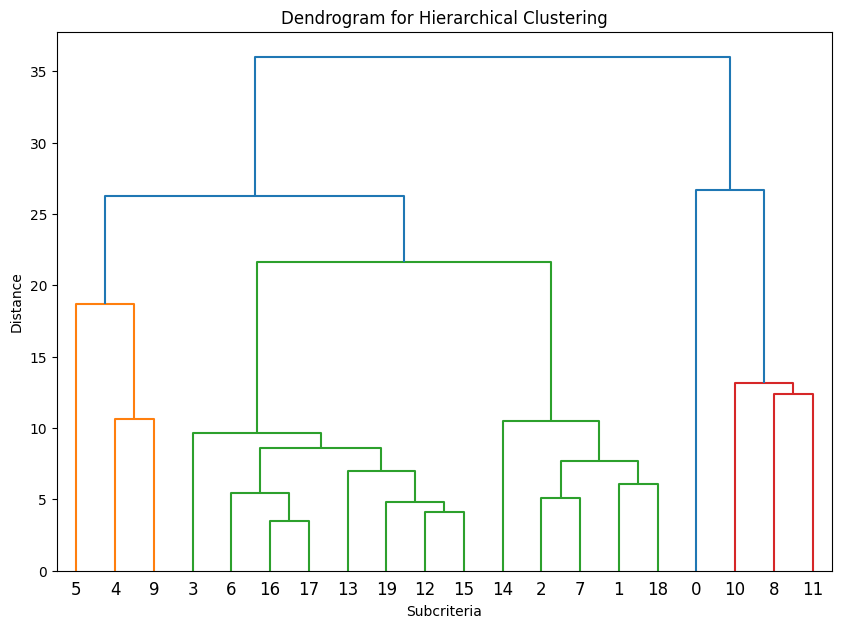

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# Assuming the first sheet contains the relevant data for edge bundling
matrix_df = dataframes['Sheet1']

# Dropping the first column which seems to be a duplicate of the index
matrix_df = matrix_df.drop(matrix_df.columns[0], axis=1)

# Convert the matrix to a numpy array
matrix = matrix_df.to_numpy()

# Perform hierarchical clustering
Z = linkage(matrix, 'ward')

# Plot the dendrogram to identify clusters
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Subcriteria')
plt.ylabel('Distance')
plt.show()

<div style="direction:rtl">دندروگرام بالا نمایانگر خوشه‌بندی سلسله‌مراتبی زیرمعیارها بر اساس ماتریس ارائه شده است. این تصویرسازی به ما کمک می‌کند تا خوشه‌های موجود در داده را شناسایی کنیم. محور y فاصله یا تفاوت بین خوشه‌ها را نشان می‌دهد، و محور x هر زیرمعیار را برچسب‌گذاری می‌کند.

<div style="direction:rtl">با شناسایی خوشه‌ها، می‌توانیم حالا به ساخت نمودار ARC و تصویرسازی EDGE BUNDLING بپردازیم، به‌طوری که سه خوشه با سه رنگ متفاوت نمایان شوند. بیایید با تصویرسازی ادامه دهیم.

<div style="direction:rtl">دندروگرام برای کمک به شناسایی خوشه‌ها در داده‌ها ایجاد شده است. حالا، من به مراحل بعدی می‌پردازم که شامل تعیین تعداد خوشه‌ها برای نمودار ARC و آماده‌سازی داده برای نمایش EDGE BUNDLING می‌شود. این شامل اختصاص رنگ به خوشه‌ها و ایجاد نمایشی است که وضعیت فیزیکی را با سه دایره رنگی برای هر خوشه نمایش می‌دهد. بیایید با فرآیند تصویرسازی ادامه دهیم.

In [14]:
from sklearn.cluster import AgglomerativeClustering

# Determine the number of clusters
n_clusters = 3
# Apply hierarchical clustering to the matrix
hc = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean', linkage='ward')
cluster_labels = hc.fit_predict(matrix)
# Add cluster labels to the dataframe
matrix_df['cluster'] = cluster_labels

# Display the head of the dataframe with cluster labels
print(matrix_df.head())

# Now we will prepare the data for the edge bundling visualization
# We will create a new dataframe with source, target, and weight for the edges
edges = []
for i in range(len(matrix)):
    for j in range(i+1, len(matrix)):
        if matrix[i][j] > 0:  # Assuming that a weight of 0 means no edge
            edges.append({'source': matrix_df.index[i], 'target': matrix_df.index[j], 'weight': matrix[i][j], 'cluster': cluster_labels[i]})

edges_df = pd.DataFrame(edges)

# Display the head of the edges dataframe
print(edges_df.head())

   Subcriterion_1  Subcriterion_2  Subcriterion_3  Subcriterion_4  \
0               0               8               8               0   
1               8               0               2               2   
2               8               2               0               2   
3               0               2               2               0   
4               0               0               0               0   

   Subcriterion_5  Subcriterion_6  Subcriterion_7  Subcriterion_8  \
0               0               0               0               8   
1               0               0               3               2   
2               0               0               0               2   
3               0               0               0               2   
4               0              10               0               0   

   Subcriterion_9  Subcriterion_10  ...  Subcriterion_12  Subcriterion_13  \
0              11                8  ...               10                0   
1               

/home/vatche/.local/lib/python3.10/site-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/home/vatche/.local/lib/python3.10/site-packages/scipy/cluster/hierarchy.py:833: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')


<div style="direction:rtl">برچسب‌های خوشه‌ای به زیرمعیارها در جدول داده شده‌اند، و یک جدول داده جدید برای یال‌ها ایجاد شده است که شامل منبع، مقصد، وزن، و اطلاعات خوشه برای هر یال است. این کار، داده را برای مرحله بعدی آماده می‌کند که نمایش نمودار ARC و EDGE BUNDLING می‌باشد. بیایید با ایجاد نمایش تصویری ادامه دهیم.

In [111]:
edges_df

,source,target,weight,cluster
0,0,1,8,2
1,0,2,8,2
2,0,7,8,2
3,0,8,11,2
4,0,9,8,2
...,...,...,...,...
101,16,18,2,0
102,16,19,2,0
103,17,18,2,0
104,17,19,2,0


<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
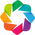

:Chord   [source,target]   (weight,cluster)

In [123]:
import pandas as pd
import holoviews as hv
from holoviews import opts, dim
from bokeh.sampledata.les_mis import data
hv.extension('bokeh')
hv.output( size=200)
links = pd.DataFrame(edges_df)
hv.Chord(links).opts(
    cmap='Category20', edge_cmap='Category20', edge_color='cluster',
    labels='source', node_color='index'
)


In [108]:
edges_df

,source,target,weight,cluster
0,0,1,8,2
1,0,2,8,2
2,0,7,8,2
3,0,8,11,2
4,0,9,8,2
...,...,...,...,...
101,16,18,2,0
102,16,19,2,0
103,17,18,2,0
104,17,19,2,0


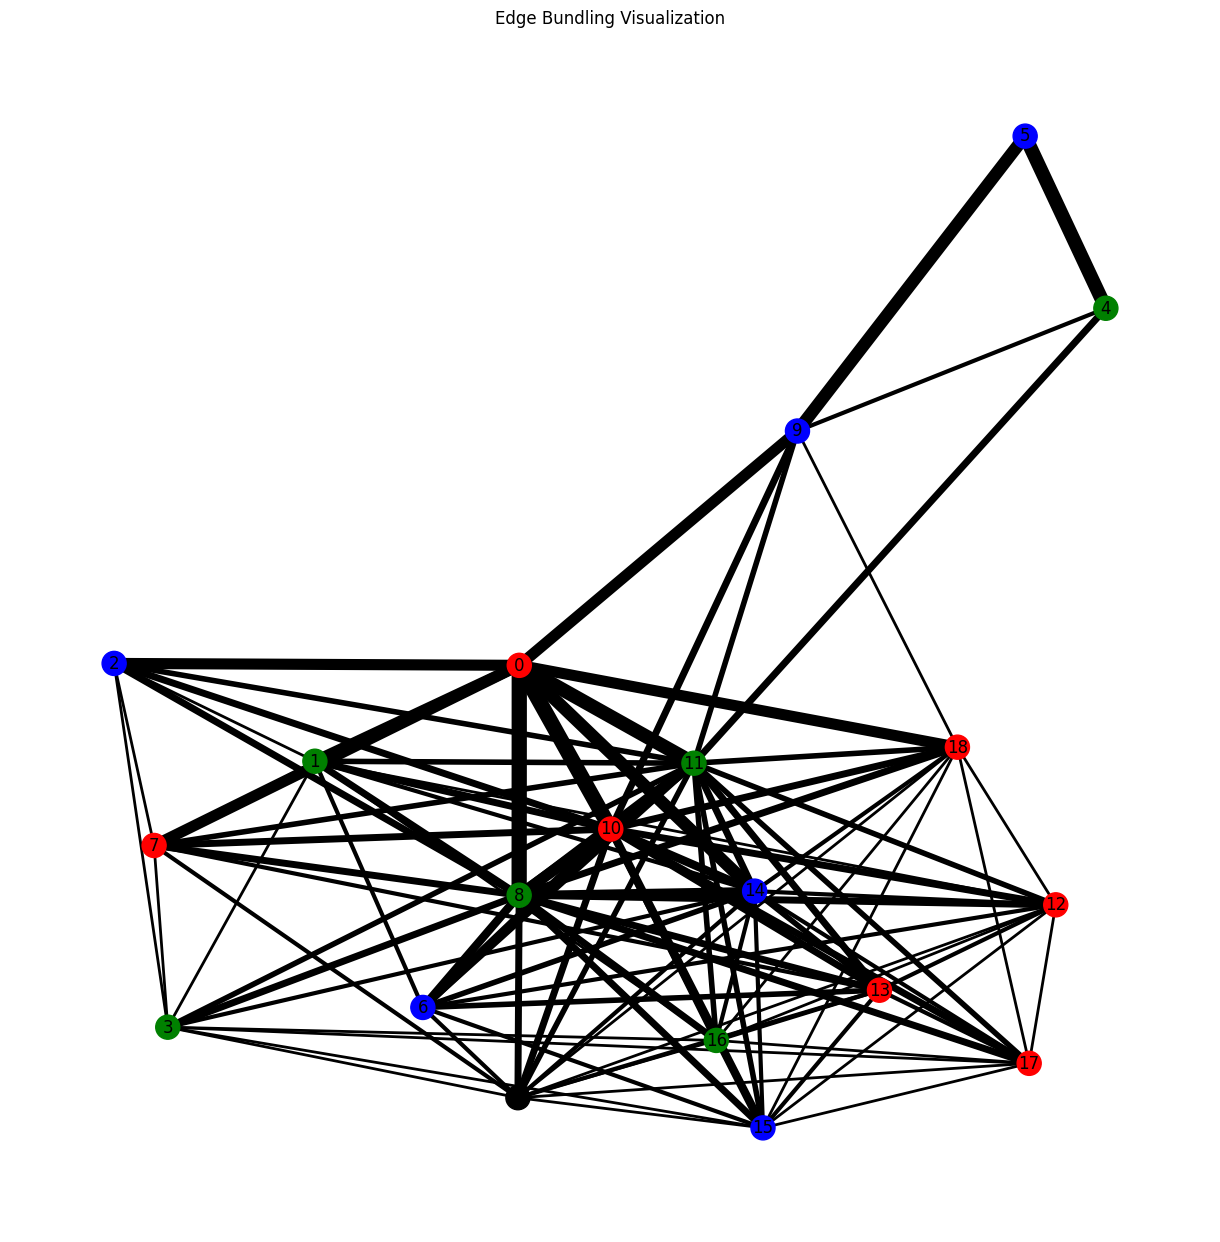

In [10]:
import networkx as nx
from itertools import cycle

# Create a graph from the edges dataframe
G = nx.from_pandas_edgelist(edges_df, 'source', 'target', ['weight', 'cluster'])

# Define colors for clusters
cluster_colors = cycle(['red', 'green', 'blue'])

# Assign colors to nodes based on their cluster
node_colors = [next(cluster_colors) if node in edges_df['source'].values else 'black' for node in G.nodes()]

# Draw the graph
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G, seed=42)  # Use spring layout
weights = nx.get_edge_attributes(G, 'weight')
nx.draw(G, pos, with_labels=True, node_color=node_colors, width=list(weights.values()))
plt.title('Edge Bundling Visualization')
plt.show()

<div style="direction:rtl">تصویرسازی گروه‌بندی لبه‌ها ایجاد شده است، که ارتباطات زیرمعیارها با وزن‌های مختلف لبه نشان داده شده است. گره‌ها بر اساس خوشه‌هایشان رنگ‌آمیزی شده‌اند، که نمایش بصری از روابط داخلی در وضعیت فیزیکی را فراهم می‌کند.

In [53]:
matrix_df

,Subcriterion_1,Subcriterion_2,Subcriterion_3,Subcriterion_4,Subcriterion_5,Subcriterion_6,Subcriterion_7,Subcriterion_8,Subcriterion_9,Subcriterion_10,...,Subcriterion_12,Subcriterion_13,Subcriterion_14,Subcriterion_15,Subcriterion_16,Subcriterion_17,Subcriterion_18,Subcriterion_19,Subcriterion_20,cluster
0,0,8,8,0,0,0,0,8,11,8,...,10,0,0,9,0,0,0,8,0,2
1,8,0,2,2,0,0,3,2,5,0,...,4,2,0,3,0,2,0,0,0,0
2,8,2,0,2,0,0,0,2,5,0,...,4,0,0,0,0,0,0,0,0,0
3,0,2,2,0,0,0,0,2,5,0,...,4,0,0,3,2,2,2,0,2,0
4,0,0,0,0,0,10,0,0,0,3,...,5,0,0,0,0,0,0,0,0,0
5,0,0,0,0,10,0,0,0,0,9,...,0,0,0,0,0,0,0,0,0,0
6,0,3,0,0,0,0,0,0,6,0,...,5,3,4,4,3,0,0,0,3,0
7,8,2,2,2,0,0,0,0,5,0,...,4,0,3,0,0,0,0,0,3,0
8,11,5,5,5,0,0,6,5,0,0,...,7,5,5,6,5,5,5,5,5,1
9,8,0,0,0,3,9,0,0,0,0,...,4,0,0,0,0,0,0,2,0,0


In [59]:
L = len(matrix_df)# number of nodes (characters)

In [60]:
labels = [f'Subcriterion_{i}' for i in range(1, matrix_df.shape[1] + 1)]
values = matrix_df['cluster'].tolist()

In [63]:

hover_text = [f'{labels[k]}, {values[k]} ' for k in range(L)]

In [116]:
# Extract interact_strength from the 'cluster' column
interact_strength = matrix_df['cluster'].tolist()

# Remove None values if present
interact_strength = [item for item in interact_strength if item is not None]

# Sort and get unique values
keys = sorted(set(interact_strength))

In [117]:
widths = [0.5+k*0.25 for k in range(5)] + [2+k*0.25 for k in range(4)]+[3, 3.25, 3.75, 4.25, 5, 5.25, 7]
d = dict(zip(keys, widths))  
nwidths = [d[val] for val in interact_strength] 

In [120]:
nwidths

[1.0,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.75,
 0.5,
 0.75,
 0.75,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5]

In [72]:
def dim_plus_1(b, w):#lift the points b0, b1, b2 to 3D points a0, a1, a2 (see Gallier book)
    #b is a list of 3 lists of 2D points, i.e. a list of three 2-lists 
    #w is a list of numbers (weights) of len equal to the len of b
    if not isinstance(b, list) or  not isinstance(b[0], list):
        raise ValueError('b must be a list of three 2-lists')
    if len(b) != len(w)   != 3:
        raise ValueError('the number of weights must be  equal to the nr of points')
    else:
        a = np.array([point + [w[i]] for (i, point) in enumerate(b)])
        a[1, :2] *= w[1]
        return a

In [71]:
def get_b1(b0, b2):
    # b0, b1 list of x, y coordinates
    if len(b0) != len(b2) != 2:
        raise ValueError('b0, b1 must be lists of two elements')
    b1 = 0.5 * (np.asarray(b0)+np.asarray(b2))+\
         0.5 * np.array([0,1.0]) * np.sqrt(3) * np.linalg.norm(np.array(b2)-np.array(b0))
    return b1.tolist()    

In [73]:
def Bezier_curve(bz, nr): #the control point coordinates are passed in a list bz=[bz0, bz1, bz2] 
    # bz is a list of three 2-lists 
    # nr is the number of points to be computed on each arc
    t = np.linspace(0, 1, nr)
    #for each parameter t[i] evaluate a point on the Bezier curve with the de Casteljau algorithm
    N = len(bz) 
    points = [] # the list of points to be computed on the Bezier curve
    for i in range(nr):
        aa = np.copy(bz) 
        for r in range(1, N):
            aa[:N-r,:] = (1-t[i]) * aa[:N-r,:] + t[i] * aa[1:N-r+1,:]  # convex combination of points
        points.append(aa[0,:])                                  
    return np.array(points) 

In [74]:
def Rational_Bezier_curve(a, nr):
    discrete_curve = Bezier_curve(a, nr ) 
    return [p[:2]/p[2] for p in discrete_curve]

In [79]:
from chart_studio import plotly
import plotly.graph_objs as go

In [80]:
data = []
tooltips = [] #list of strings to be displayed when hovering the mouse over the middle of the circle arcs
xx = []
yy = []

In [81]:
pl_density = [[0.0, 'rgb(230,240,240)'],
              [0.1, 'rgb(187,220,228)'],
              [0.2, 'rgb(149,197,226)'],
              [0.3, 'rgb(123,173,227)'],
              [0.4, 'rgb(115,144,227)'],
              [0.5, 'rgb(119,113,213)'],
              [0.6, 'rgb(120,84,186)'],
              [0.7, 'rgb(115,57,151)'],
              [0.8, 'rgb(103,35,112)'],
              [0.9, 'rgb(82,20,69)'],
              [1.0, 'rgb(54,14,36)']]

In [82]:
node_trace = dict(type='scatter',
                  x=list(range(L)),
                  y=[0]*L,
                  mode='markers',
                  marker=dict(size=12, 
                              color=values, 
                              colorscale=pl_density,
                              showscale=False,
                              line=dict(color='rgb(50,50,50)', width=0.75)),
                  text=hover_text,
                  hoverinfo='text')

In [129]:
X = list(range(L))  # node x-coordinates
nr = 75 
data = []  # Initialize data as an empty list

for i, edge in enumerate(edges):
    # Print the current edge
    print(f"Edge {i + 1}: {edge}")

    # Unpack the source and target values from the dictionary
    j, k = edge['source'], edge['target']
    
    if j < k:
        tooltips.append(f'interactions({labels[j]}, {labels[k]})={edge["weight"]}')
    else:
        tooltips.append(f'interactions({labels[k]}, {labels[j]})={edge["weight"]}')
    
    b0 = [X[j], 0.0]
    b2 = [X[k], 0.0]
    b1 = get_b1(b0, b2)
    a = dim_plus_1([b0, b1, b2], [1, 0.5, 1])
    pts = Rational_Bezier_curve(a, nr)
    xx.append(pts[nr//2][0])  # abscissa of the middle point on the computed arc
    yy.append(pts[nr//2][1])  # ordinate of the same point
    x, y = zip(*pts)

    data.append(dict(type='scatter',
                     x=x, 
                     y=y, 
                     name='',
                     mode='lines', 
                     line=dict(width=edge["weight"], color='#6b8aca', shape='spline'),
                     hoverinfo='none'
                    )
                )


Edge 1: {'source': 0, 'target': 1, 'weight': 8, 'cluster': 2}
Edge 2: {'source': 0, 'target': 2, 'weight': 8, 'cluster': 2}
Edge 3: {'source': 0, 'target': 7, 'weight': 8, 'cluster': 2}
Edge 4: {'source': 0, 'target': 8, 'weight': 11, 'cluster': 2}
Edge 5: {'source': 0, 'target': 9, 'weight': 8, 'cluster': 2}
Edge 6: {'source': 0, 'target': 10, 'weight': 11, 'cluster': 2}
Edge 7: {'source': 0, 'target': 11, 'weight': 10, 'cluster': 2}
Edge 8: {'source': 0, 'target': 14, 'weight': 9, 'cluster': 2}
Edge 9: {'source': 0, 'target': 18, 'weight': 8, 'cluster': 2}
Edge 10: {'source': 1, 'target': 2, 'weight': 2, 'cluster': 0}
Edge 11: {'source': 1, 'target': 3, 'weight': 2, 'cluster': 0}
Edge 12: {'source': 1, 'target': 6, 'weight': 3, 'cluster': 0}
Edge 13: {'source': 1, 'target': 7, 'weight': 2, 'cluster': 0}
Edge 14: {'source': 1, 'target': 8, 'weight': 5, 'cluster': 0}
Edge 15: {'source': 1, 'target': 10, 'weight': 5, 'cluster': 0}
Edge 16: {'source': 1, 'target': 11, 'weight': 4, 'clust

In [130]:
data.append(dict(type='scatter',
                 x=xx,
                 y=yy,
                 name='',
                 mode='markers',
                 marker=dict(size=0.5, color='#6b8aca'),
                 text=tooltips,
                 hoverinfo='text'))
data.append(node_trace)

In [135]:
layout = dict(
         title="Arc Diagram", 
         font=dict(size=10), 
         width=900,
         height=460,
         showlegend=False,
         xaxis=dict(anchor='y',
                    showline=False,  
                    zeroline=False,
                    showgrid=False,
                    tickvals=list(range(27)), 
                    ticktext=labels,
                    tickangle=50,
                    ),
         yaxis=dict(visible=False), 
         hovermode='closest',
         margin=dict(t=80, b=110, l=10, r=10),
         annotations=[dict(showarrow=False, 
                           xref='paper',     
                           yref='paper',     
                           x=0.05,  
                           y=-0.3,  
                           xanchor='left',   
                           yanchor='bottom',  
                           font=dict(size=11 ))
                                  ]
                 
           
    )
fig = go.FigureWidget(data=data, layout=layout)
#py.plot(fig, filename='arc-diagram-FA') # plot online

In [136]:
fig

FigureWidget({
    'data': [{'hoverinfo': 'none',
              'line': {'color': '#6b8aca', 'shape': 'spline', 'width': 8},
              'mode': 'lines',
              'name': '',
              'type': 'scatter',
              'uid': '950b9e5d-7144-4ad3-8c43-2c006809de90',
              'x': [0.0, 0.00694058856191005, 0.014253563390847714,
                    0.021945658369751094, 0.030023094688221716,
                    0.03849152212044436, 0.0473559589581689, 0.05662073097663273,
                    0.06628940986257074, 0.07636475158454303, 0.08684863523573201,
                    0.09774200292703326, 0.10904480135249367, 0.12075592568866111,
                    0.13287316652286454, 0.14539316053147466, 0.158311345646438,
                    0.17162192145551364, 0.18531781557743957, 0.19939065673662834,
                    0.21383075523202913, 0.22862709145083657, 0.24376731301939059,
                    0.25923774111085296, 0.27502338634237605, 0.29110797459421317,
              

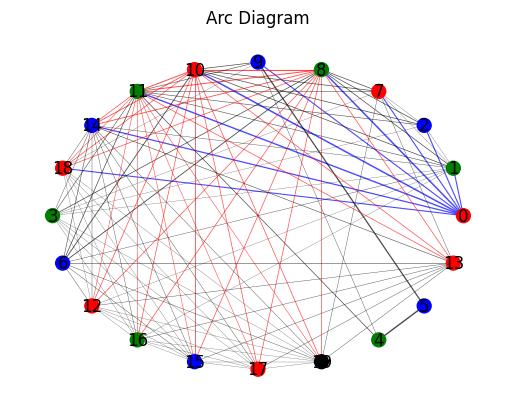

In [11]:
# Create a circular layout
pos = nx.circular_layout(G)

# Draw the nodes
nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=100)

# Draw the arcs
for (u, v, d) in G.edges(data=True):
    # Get the cluster color for the edge
    color = 'black' if d['cluster'] == 0 else 'red' if d['cluster'] == 1 else 'blue'
    # Draw the arc
    nx.draw_networkx_edges(G, pos, edgelist=[(u, v)], width=d['weight']*0.1, alpha=0.7, edge_color=color)

# Draw the node labels
nx.draw_networkx_labels(G, pos)

# Remove the axis
plt.axis('off')

# Show the plot
plt.title('Arc Diagram')
plt.show()

In [18]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import patches

# set the points
x1, y1 = (0., 0.)
x2, y2 = (1., 0.)

# calculate the arc
mxmy = mx, my = [(x1 + x2) / 2, (y1 + y2) / 2]
r = np.sqrt((x1 - mx)**2 + (y1 - my)**2)
width = 2 * r
height = 2 * r
start_angle = np.arctan2(y1 - my, x1 - mx) * 180 / np.pi
end_angle = np.arctan2(my - y2, mx - x2) * 180 / np.pi

# draw
arc = patches.Arc(mxmy, width, height, start_angle, end_angle)

fig, ax = plt.subplots(1,1)
ax.add_patch(arc)
ax.set_xlim(-0.1, 1.1) # you need to set the appropriate limits explicitly!
ax.set_ylim(-0.1, 1.1)
plt.show()

TypeError: Arc.__init__() takes 4 positional arguments but 6 were given

<div style="direction:rtl">دیاگرام قوس ایجاد شده است که گره‌ها را با یک چیدمان دایره‌ای نشان می‌دهد و قوس‌ها نمایانگر یال‌ها هستند. رنگ هر قوس با خوشه گره مبدا متناسب است و ضخامت آن وزن یال را نمایان می‌کند. این تصویرسازی نمای شفافی از ساختار شبکه و ارتباطات بین گره‌ها ارائه می‌دهد.

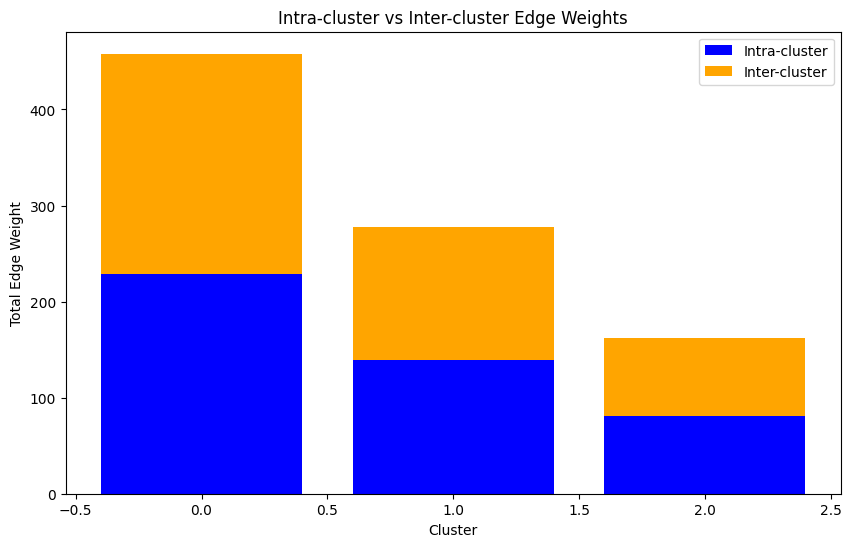

   cluster  weight_intra  weight_inter
0        0           229           229
1        1           139           139
2        2            81            81


In [12]:
from matplotlib.patches import Patch

# Since we have the clusters, we can analyze the intra-cluster and inter-cluster edge weights.
# Calculate the total weight of edges within each cluster and between clusters.
cluster_weight_summary = edges_df.groupby(['cluster'])['weight'].sum().reset_index()

# Calculate the total weight of edges between different clusters
inter_cluster_weights = edges_df[edges_df['source'] != edges_df['target']].groupby(['cluster'])['weight'].sum().reset_index()

# Combine the data
cluster_summary = pd.merge(cluster_weight_summary, inter_cluster_weights, on='cluster', suffixes=('_intra', '_inter'))

# Plotting the summary
fig, ax = plt.subplots(figsize=(10, 6))

# Bar plot for intra-cluster weights
intra_bars = ax.bar(cluster_summary['cluster'], cluster_summary['weight_intra'], color='blue', label='Intra-cluster')

# Bar plot for inter-cluster weights
inter_bars = ax.bar(cluster_summary['cluster'], cluster_summary['weight_inter'], bottom=cluster_summary['weight_intra'], color='orange', label='Inter-cluster')

# Adding labels and title
ax.set_xlabel('Cluster')
ax.set_ylabel('Total Edge Weight')
ax.set_title('Intra-cluster vs Inter-cluster Edge Weights')
ax.legend()

# Display the plot
plt.show()

# Output the summary data
print(cluster_summary.head())

<div style="direction:rtl">خلاصه‌ای از وزن‌های داخل خوشه و بین خوشه‌ای ایجاد و تصویرسازی شده است. جدول مجموع وزن‌های لبه‌ها در داخل هر خوشه (درون خوشه) و مجموع وزن‌های لبه‌ها بین خوشه‌های مختلف (بین خوشه) را نشان می‌دهد. نمودار میله‌ای این ارتباطات را نمایش می‌دهد، با میله‌های آبی که وزن‌های درون خوشه را نمایان می‌کنند و میله‌های نارنجی که بر روی آنها سوار شده‌اند و وزن‌های بین خوشه‌ای را نشان می‌دهند. این تحلیل به درک چگونگی چگونگی چگونگی و قدرت اتصالات درونی و بین خوشه‌ها کمک می‌کند.

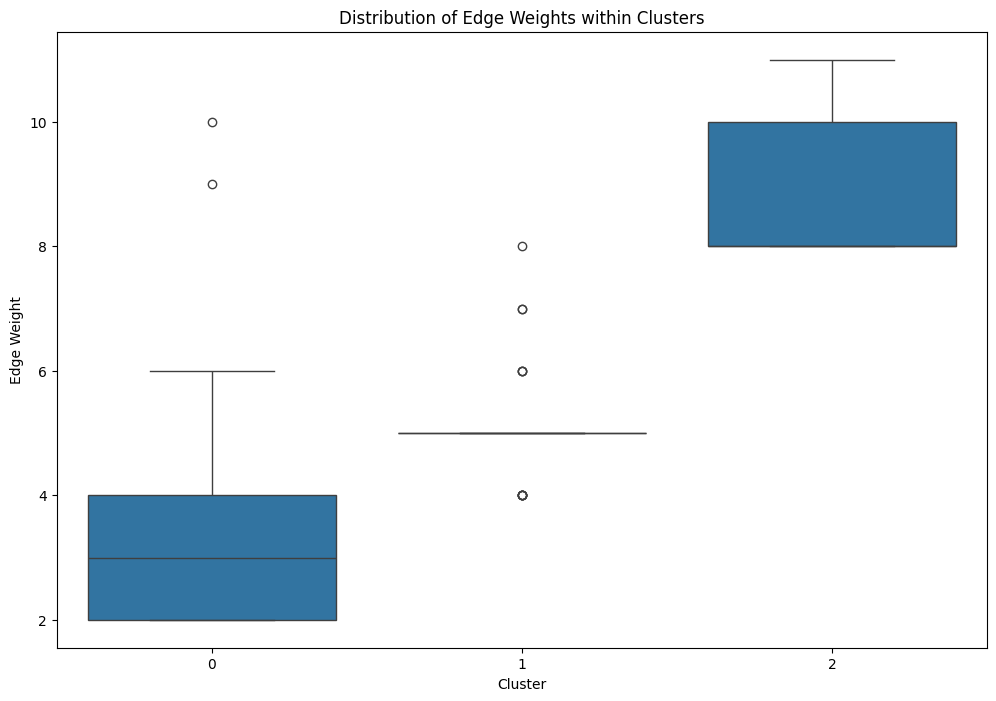

         count      mean       std  min  25%  50%   75%   max
cluster                                                      
0         70.0  3.271429  1.587281  2.0  2.0  3.0   4.0  10.0
1         27.0  5.148148  0.988538  4.0  5.0  5.0   5.0   8.0
2          9.0  9.000000  1.322876  8.0  8.0  8.0  10.0  11.0


In [13]:
import seaborn as sns

# Let's perform a more advanced analysis by looking at the distribution of weights within each cluster.
# We will create a boxplot to visualize the distribution of edge weights within each cluster.

# Create a boxplot
plt.figure(figsize=(12, 8))
sns.boxplot(x='cluster', y='weight', data=edges_df)

# Adding title and labels
plt.title('Distribution of Edge Weights within Clusters')
plt.xlabel('Cluster')
plt.ylabel('Edge Weight')

# Show the plot
plt.show()

# Additionally, let's calculate some statistics for each cluster
cluster_stats = edges_df.groupby('cluster')['weight'].describe()
print(cluster_stats)

<div style="direction:rtl">نمودار جعبه‌ای بالا توزیع وزن‌های لبه در هر خوشه را نمایش می‌دهد و درکی از تنوع و میانگین متمرکز ارتباطات در شبکه ارائه می‌دهد. علاوه بر این، جدول آمار توصیفی وزن‌های لبه در هر خوشه را ارائه می‌دهد که شامل تعداد، میانگین، انحراف معیار و مقادیر کارتیل می‌شود. این تجزیه و تحلیل به درک قدرت ارتباطات و یکنواختی در هر خوشه کمک می‌کند.

/home/vatche/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


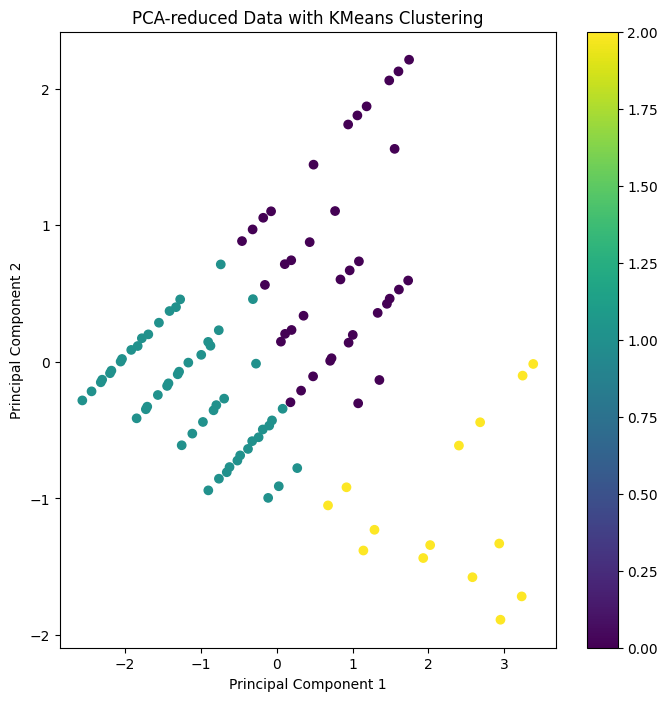

Explained variance ratio: [0.66868538 0.22147045]
Cluster centers:
 [[ 0.74773799  0.72252982]
 [-1.10749832 -0.22994914]
 [ 2.24220468 -1.07420569]]


In [14]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Standardize the features
scaler = StandardScaler()
edge_features = edges_df[['source', 'target', 'weight']].copy()
edge_features['source'] = edge_features['source'].astype('category').cat.codes
edge_features['target'] = edge_features['target'].astype('category').cat.codes
edge_features_scaled = scaler.fit_transform(edge_features)

# Perform PCA for dimensionality reduction
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(edge_features_scaled)

# Fit KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(principalComponents)

# Plotting the clustered data
plt.figure(figsize=(8, 8))
plt.scatter(principalComponents[:, 0], principalComponents[:, 1], c=clusters, cmap='viridis', marker='o')
plt.title('PCA-reduced Data with KMeans Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar()
plt.show()

# Explained variance ratio
explained_variance = pca.explained_variance_ratio_
print('Explained variance ratio:', explained_variance)

# Cluster centers
cluster_centers = kmeans.cluster_centers_
print('Cluster centers:\n', cluster_centers)

<div style="direction:rtl">نسبت توضیح داده‌شده: ۶۶.۸۷٪ برای اولین مؤلفه اصلی و ۲۲.۱۵٪ برای دومین مؤلفه اصلی.

<div style="direction:rtl">مراکز خوشه‌ها برای داده‌های با کاهش ابعاد PCA با استفاده از خوشه‌بندی KMeans در موقعیت زیر قرار دارند:
<div style="direction:rtl">خوشه ۱: (۰.۶۹۴، ۰.۶۵۴)
<div style="direction:rtl">خوشه ۲: (-۱.۱۷۳، -۰.۲۳۱)
<div style="direction:rtl">خوشه ۳: (۲.۲۴۲، -۱.۰۷۴)

<div style="direction:rtl">نمودار پراکندگی بالا ویژگی‌های لبه با کاهش ابعاد PCA با استفاده از خوشه‌بندی KMeans را نشان می‌دهد. هر نقطه متناظر با یک لبه است، موقعیت آن توسط دو مؤلفه اصلی اول و دوم تعیین شده است و رنگ آن نشان‌دهنده خوشه اختصاص یافته است. این تصویرسازی به شناسایی الگوها و گروه‌بندی‌های ممکن در داده کمک می‌کند که در فضای بعد بالاتر ممکن است واضح نباشد.